In [217]:
#Import modules
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import datetime

url = "~/documents/python/ruter_data.csv"
df = pd.read_csv(url, sep=';')
df.head()

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10


In [218]:
#Konverterer fra object til tid
df['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'] = pd.to_datetime(df['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'], errors='coerce')
df['Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra'] = pd.to_datetime(df['Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra'], errors='coerce')


In [219]:
#Lager en ny kolonne som angir tidsforsinkelse (avvik mellom planlagt og faktisk ankomst)
df['Forsinket']= df['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'] - df['Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra']

In [220]:
df.head()

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord,Forsinket
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,2021-09-24 10:53:53,10:53:59,2021-09-24 10:53:00,10:53:00,112,5,0 days 00:00:53
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,2021-09-24 13:12:20,13:12:26,2021-09-24 13:12:00,13:12:00,112,5,0 days 00:00:20
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,2021-09-24 10:18:56,10:19:21,2021-09-24 10:19:00,10:19:00,112,6,-1 days +23:59:56
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,2021-09-24 13:52:04,13:52:26,2021-09-24 13:51:00,13:51:00,112,10,0 days 00:01:04
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,2021-09-24 07:34:13,07:34:53,2021-09-24 07:33:00,07:33:00,112,10,0 days 00:01:13


In [221]:
df["Forsinket"].head()
#Ser at dtype=timedelta64

0     0 days 00:00:53
1     0 days 00:00:20
2   -1 days +23:59:56
3     0 days 00:01:04
4     0 days 00:01:13
Name: Forsinket, dtype: timedelta64[ns]

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 18 columns):
 #   Column                                     Non-Null Count  Dtype          
---  ------                                     --------------  -----          
 0   TurId                                      6000 non-null   object         
 1   Dato                                       6000 non-null   object         
 2   Fylke                                      6000 non-null   object         
 3   Område                                     6000 non-null   object         
 4   Kommune                                    6000 non-null   object         
 5   Holdeplass_Fra                             6000 non-null   object         
 6   Holdeplass_Til                             6000 non-null   object         
 7   Linjetype                                  6000 non-null   object         
 8   Linjefylke                                 6000 non-null   object         
 9   Linjenav

In [223]:
#Etter konvertering har verdier forsvunnet. Renser. 
df=df.replace(r'^\s*$', np.nan, regex=True)
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5775 entries, 0 to 5999
Data columns (total 18 columns):
 #   Column                                     Non-Null Count  Dtype          
---  ------                                     --------------  -----          
 0   TurId                                      5775 non-null   object         
 1   Dato                                       5775 non-null   object         
 2   Fylke                                      5775 non-null   object         
 3   Område                                     5775 non-null   object         
 4   Kommune                                    5775 non-null   object         
 5   Holdeplass_Fra                             5775 non-null   object         
 6   Holdeplass_Til                             5775 non-null   object         
 7   Linjetype                                  5775 non-null   object         
 8   Linjefylke                                 5775 non-null   object         
 9   Linjenav

In [224]:
#Lager tidskomponenter for å kunne avgjøre grad av forsinkelse
comp1 = datetime.timedelta(minutes=1)
comp2 = datetime.timedelta(minutes=15)
comp3 = datetime.timedelta(minutes=30)

In [225]:
df=df.rename(columns={"Forsinket": "Forsinkelse"})

In [226]:
df["Forsinkelse"].head()

0     0 days 00:00:53
1     0 days 00:00:20
2   -1 days +23:59:56
3     0 days 00:01:04
4     0 days 00:01:13
Name: Forsinkelse, dtype: timedelta64[ns]

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5775 entries, 0 to 5999
Data columns (total 18 columns):
 #   Column                                     Non-Null Count  Dtype          
---  ------                                     --------------  -----          
 0   TurId                                      5775 non-null   object         
 1   Dato                                       5775 non-null   object         
 2   Fylke                                      5775 non-null   object         
 3   Område                                     5775 non-null   object         
 4   Kommune                                    5775 non-null   object         
 5   Holdeplass_Fra                             5775 non-null   object         
 6   Holdeplass_Til                             5775 non-null   object         
 7   Linjetype                                  5775 non-null   object         
 8   Linjefylke                                 5775 non-null   object         
 9   Linjenav

In [228]:
#True/False-kolonne for forsinkelse mellom 1-15 min
df['Delay_1-15_min']= (df['Forsinkelse']>comp1) & (df['Forsinkelse']<=comp2)

In [229]:
#True/False-kolonne for forsinkelse mellom 16-30 min
df['Delay_16-30_min']= (df['Forsinkelse']>comp2) & (df['Forsinkelse']<=comp3)
#True/False-kolonne for forsinkelse over 30 min
df['Delay>30_min']= df['Forsinkelse']>comp3 

In [230]:
df.head()

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,...,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord,Forsinkelse,Delay_1-15_min,Delay_16-30_min,Delay>30_min
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,...,2021-09-24 10:53:53,10:53:59,2021-09-24 10:53:00,10:53:00,112,5,0 days 00:00:53,False,False,False
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,...,2021-09-24 13:12:20,13:12:26,2021-09-24 13:12:00,13:12:00,112,5,0 days 00:00:20,False,False,False
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,...,2021-09-24 10:18:56,10:19:21,2021-09-24 10:19:00,10:19:00,112,6,-1 days +23:59:56,False,False,False
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,...,2021-09-24 13:52:04,13:52:26,2021-09-24 13:51:00,13:51:00,112,10,0 days 00:01:04,True,False,False
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,...,2021-09-24 07:34:13,07:34:53,2021-09-24 07:33:00,07:33:00,112,10,0 days 00:01:13,True,False,False


In [231]:
#Lager en ny feature med Busstørrelsen
df['Buss_str']=pd.qcut(df["Kjøretøy_Kapasitet"], q=3, labels=["Liten","Medium","Stor"] )

In [232]:
#Lager en kategori for å definere om bussen går i rushtiden (07-09, 15-17)
comp4=datetime.timedelta(hours=7)
comp5=datetime.timedelta(hours=9)
comp6=datetime.timedelta(hours=15)
comp7=datetime.timedelta(hours=17)
df_T=pd.to_timedelta(df['Tidspunkt_Planlagt_Avgang_Holdeplass_Fra'], errors='coerce') # Konverterer fra obj til tid
df['Rushtid']=(df_T>comp4) & (df_T<comp5) | (df_T>comp6) & (df_T<comp7)

In [233]:
df.head()

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,...,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord,Forsinkelse,Delay_1-15_min,Delay_16-30_min,Delay>30_min,Buss_str,Rushtid
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,...,2021-09-24 10:53:00,10:53:00,112,5,0 days 00:00:53,False,False,False,Medium,False
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,...,2021-09-24 13:12:00,13:12:00,112,5,0 days 00:00:20,False,False,False,Medium,False
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,...,2021-09-24 10:19:00,10:19:00,112,6,-1 days +23:59:56,False,False,False,Medium,False
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,...,2021-09-24 13:51:00,13:51:00,112,10,0 days 00:01:04,True,False,False,Medium,False
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,...,2021-09-24 07:33:00,07:33:00,112,10,0 days 00:01:13,True,False,False,Medium,True


In [234]:
#Deler opp slik at det kommer tallverdier istedetfor True/False
one_hot = pd.get_dummies(df, columns = ['Delay_1-15_min', 'Delay_16-30_min', 'Delay>30_min', 'Rushtid'])
one_hot.head()

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,...,Forsinkelse,Buss_str,Delay_1-15_min_False,Delay_1-15_min_True,Delay_16-30_min_False,Delay_16-30_min_True,Delay>30_min_False,Delay>30_min_True,Rushtid_False,Rushtid_True
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,...,0 days 00:00:53,Medium,1,0,1,0,1,0,1,0
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,...,0 days 00:00:20,Medium,1,0,1,0,1,0,1,0
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,...,-1 days +23:59:56,Medium,1,0,1,0,1,0,1,0
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,...,0 days 00:01:04,Medium,0,1,1,0,1,0,1,0
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,...,0 days 00:01:13,Medium,0,1,1,0,1,0,0,1


In [235]:
#Sletter unødvendige kolonner
one_hot = one_hot.drop(["Delay_1-15_min_False","Delay_16-30_min_False","Delay>30_min_False","Rushtid_False"], axis=1)


In [236]:
#Gir nytt navn til de andre kolonnene
one_hot=one_hot.rename(columns={"Delay_1-15_min_True": "Delay_1-15_min", "Delay_16-30_min_True":"Delay_16-30_min", "Delay>30_min_True":"Delay>30_min", "Rushtid_True":"Rushtid"})

In [237]:
one_hot.head()

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,...,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord,Forsinkelse,Buss_str,Delay_1-15_min,Delay_16-30_min,Delay>30_min,Rushtid
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,...,2021-09-24 10:53:00,10:53:00,112,5,0 days 00:00:53,Medium,0,0,0,0
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,...,2021-09-24 13:12:00,13:12:00,112,5,0 days 00:00:20,Medium,0,0,0,0
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,...,2021-09-24 10:19:00,10:19:00,112,6,-1 days +23:59:56,Medium,0,0,0,0
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,...,2021-09-24 13:51:00,13:51:00,112,10,0 days 00:01:04,Medium,1,0,0,0
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,...,2021-09-24 07:33:00,07:33:00,112,10,0 days 00:01:13,Medium,1,0,0,1


<AxesSubplot:xlabel='Rushtid', ylabel='count'>

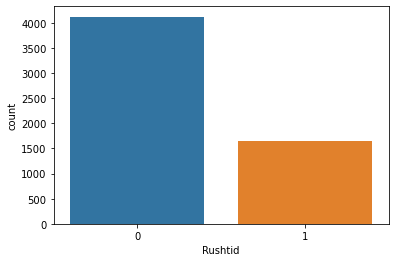

In [242]:
sns.countplot(x='Rushtid', data=one_hot)

<AxesSubplot:xlabel='Delay>30_min', ylabel='count'>

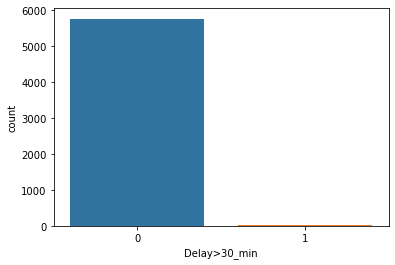

In [241]:
sns.countplot(x='Delay>30_min', data=one_hot)

<AxesSubplot:xlabel='Delay_16-30_min', ylabel='count'>

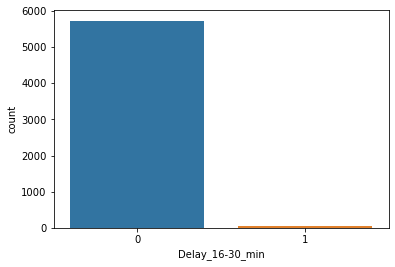

In [240]:
sns.countplot(x='Delay_16-30_min', data=one_hot)

<AxesSubplot:xlabel='Delay_1-15_min', ylabel='count'>

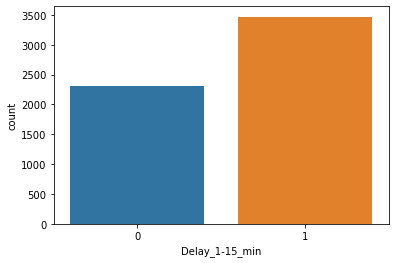

In [239]:
sns.countplot(x='Delay_1-15_min', data=one_hot)

<AxesSubplot:xlabel='Buss_str', ylabel='count'>

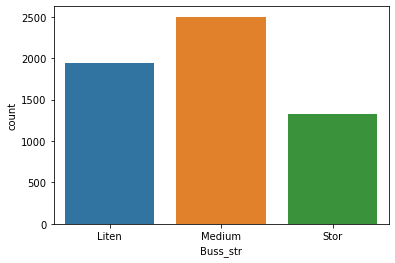

In [238]:
sns.countplot(x='Buss_str', data=one_hot)